Saved plot to ..\results\plots\en_cot_heatmap.png


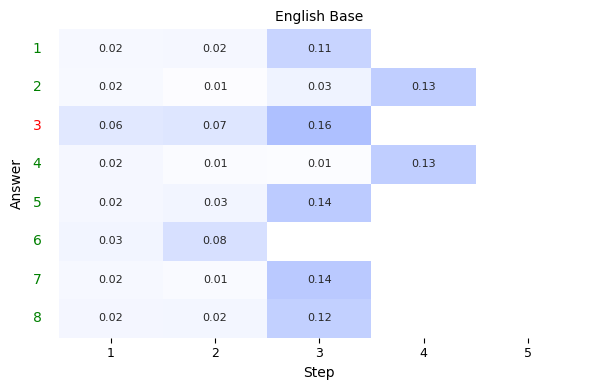

Saved plot to ..\results\plots\en_negation_heatmap.png


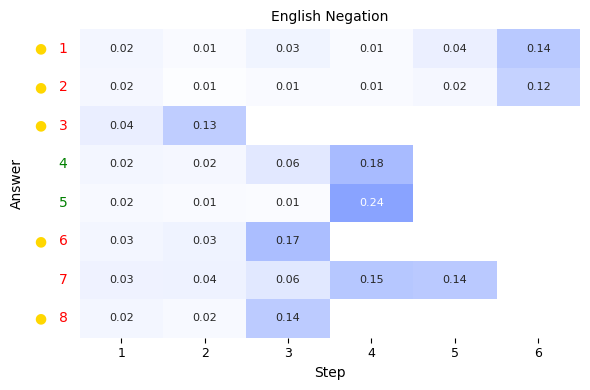

Saved plot to ..\results\plots\en_distractor_heatmap.png


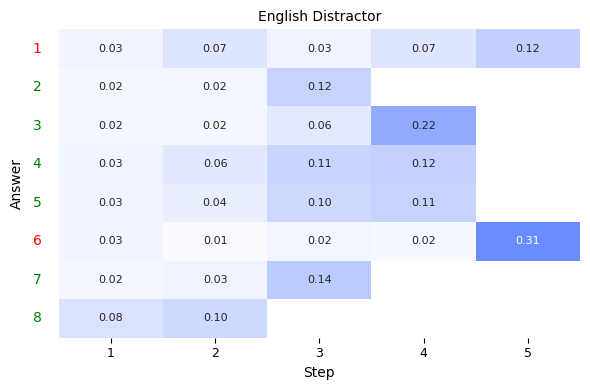

Saved plot to ..\results\plots\fr_cot_heatmap.png


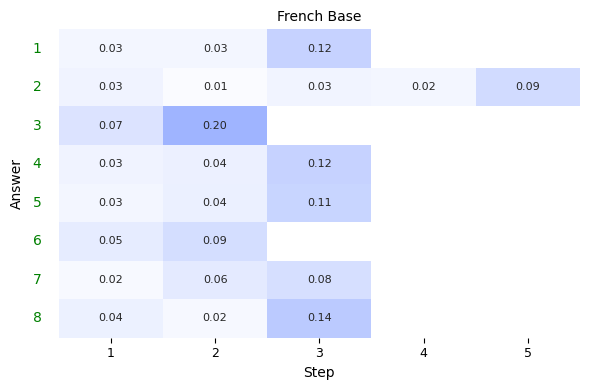

Saved plot to ..\results\plots\fr_negation_heatmap.png


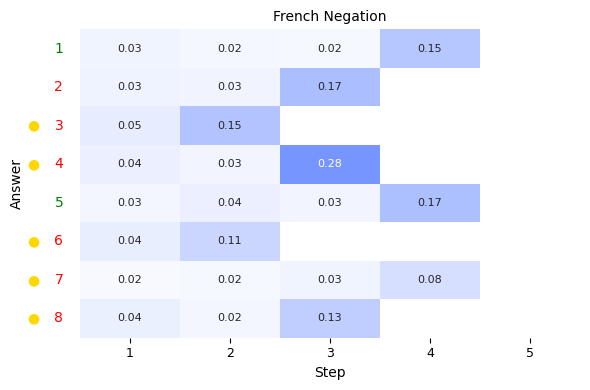

Saved plot to ..\results\plots\fr_distractor_heatmap.png


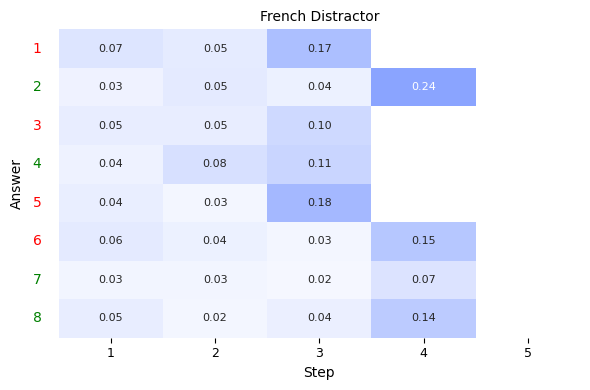

Saved plot to ..\results\plots\de_cot_heatmap.png


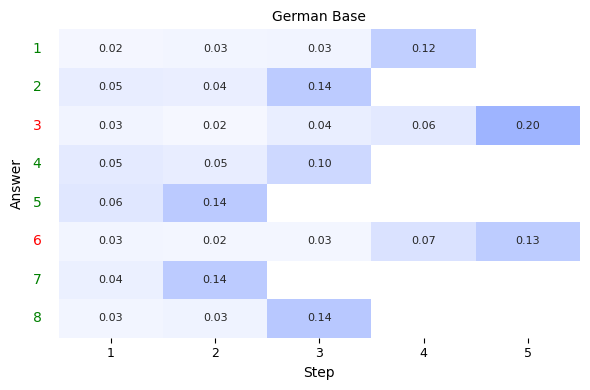

Saved plot to ..\results\plots\de_negation_heatmap.png


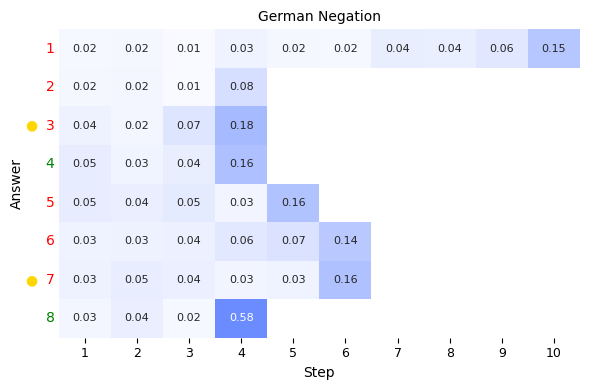

Saved plot to ..\results\plots\de_distractor_heatmap.png


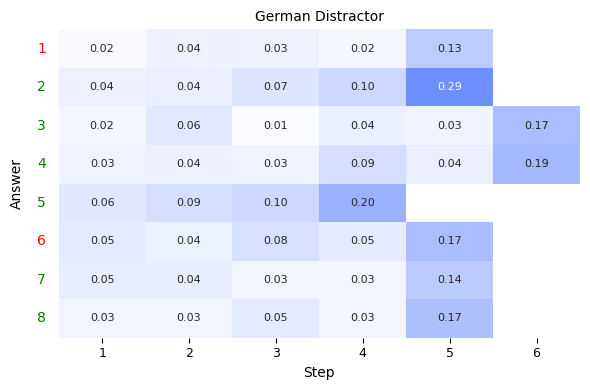

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os

colors = ["white", "#6b8cff"]
cmap = LinearSegmentedColormap.from_list("white_lightblue", colors)

df = pd.read_csv('../results/inseq_heatmap_data.csv')

step_cols = [f'Step_{i}' for i in range(1, 11)]
for col in step_cols:
    df[col] = df[col].str.replace(',', '.').astype(float)

language_names = {'en': 'English', 'fr': 'French', 'de': 'German'}
condition_names = {'cot': 'Base', 'negation': 'Negation', 'distractor': 'Distractor'}

step_counts = {
    ('en', 'cot'): 5,
    ('en', 'negation'): 6,
    ('en', 'distractor'): 5,
    ('fr', 'cot'): 5,
    ('fr', 'negation'): 5,
    ('fr', 'distractor'): 5,
    ('de', 'cot'): 5,
    ('de', 'negation'): 10,
    ('de', 'distractor'): 6
}

languages = ['en', 'fr', 'de']
conditions = ['cot', 'negation', 'distractor']

results_dir = os.path.join('..', 'results', 'plots')
os.makedirs(results_dir, exist_ok=True)

for language in languages:
    for condition in conditions:
        plt.figure(figsize=(6, 4))
        ax = plt.gca()

        subset = df[(df['language'] == language) & (df['condition'] == condition)]
        
        steps_to_show = step_counts.get((language, condition), 5)
        
        heatmap_data = subset[[f'Step_{i}' for i in range(1, steps_to_show+1)]]

        sns.heatmap(heatmap_data, 
                   ax=ax,
                   cmap=cmap,
                   vmin=0,
                   vmax=0.3,
                   cbar=False,
                   annot=True,
                   fmt='.2f',
                   annot_kws={'size': 8},
                   mask=heatmap_data.isnull(),
                   yticklabels=False)
        
        labelpad = 45 if condition == 'negation' and language in ['en', 'fr'] else 30
        
        ax.set_ylabel('Answer', rotation=90, ha='center', va='center', 
                     labelpad=labelpad, position=(-0.5, 0.5), fontsize=10)

        for y, (idx, row) in enumerate(subset.iterrows()):
            answer = row['answer']
            index = str(row['index'])
            
            index_x = -0.25
            symbol_x = -0.4
            
            if answer in ['gold', 'not_gold_true']:
                ax.text(index_x, y+0.5, index, ha='left', va='center', 
                       color='green', fontsize=10, fontweight='normal')
            elif answer == 'gold_false':
                ax.text(symbol_x, y+0.5, '●', ha='right', va='center', 
                       color='gold', fontsize=10)
                ax.text(index_x, y+0.5, index, ha='left', va='center', 
                       color='red', fontsize=10, fontweight='normal')
            elif answer in ['not_gold', 'not_gold_false']:
                ax.text(index_x, y+0.5, index, ha='left', va='center', 
                       color='red', fontsize=10, fontweight='normal')
            else:
                ax.text(index_x, y+0.5, index, ha='left', va='center', 
                       color='black', fontsize=10, fontweight='normal')
        
        title = f"{language_names[language]} {condition_names[condition]}"
        plt.title(title, fontsize=10)
        
        ax.set_xlabel('Step', fontsize=10)
        ax.set_xticklabels(range(1, steps_to_show+1), rotation=0, fontsize=9)
        
        plt.tight_layout()
        
        filename = f"{language}_{condition}_heatmap.png"
        save_path = os.path.join('..', 'results', 'plots', filename)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved plot to {save_path}")
        
        plt.show()